# Sorting

In [2]:
import numpy as np

x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [3]:
x.sort() # sorting inplace
x

array([1, 2, 3, 4, 5])

In [4]:
y = np.array([2, 1, 4, 3, 5])
i = np.argsort(y)  # returns indices of the sorted elements 
print(i)

[1 0 3 2 4]


In [5]:
y[i]

array([1, 2, 3, 4, 5])

In [6]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [7]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [8]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial Sorts

In [9]:
x = np.array([7, 2, 3, 1, 6, 5, 4])  # smallest k values to the left of the partition
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Similar for multi-dimensional arrays

### E.g k-nearest neighbours

In [17]:
points = np.random.randint(10, size=(6, 2))

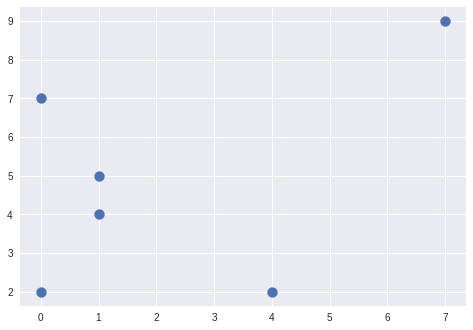

In [18]:
%matplotlib inline
# visual representation of the 6 points
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.scatter(points[:, 0], points[:, 1], s=100)
plt.show()

In [19]:
points[:, np.newaxis, :]

array([[[0, 2]],

       [[7, 9]],

       [[1, 4]],

       [[0, 7]],

       [[4, 2]],

       [[1, 5]]])

In [21]:
points[np.newaxis, :, :]

array([[[0, 2],
        [7, 9],
        [1, 4],
        [0, 7],
        [4, 2],
        [1, 5]]])

In [28]:
diff = points[np.newaxis, :, :] - points[:, np.newaxis, :]
# diff

In [29]:
dif_sq = diff ** 2
#dif_sq

In [33]:
dist_sq = dif_sq.sum(axis=2)
dist_sq

array([[ 0, 98,  5, 25, 16, 10],
       [98,  0, 61, 53, 58, 52],
       [ 5, 61,  0, 10, 13,  1],
       [25, 53, 10,  0, 41,  5],
       [16, 58, 13, 41,  0, 18],
       [10, 52,  1,  5, 18,  0]])

In [40]:
# nearest = np.argsort(dist_sq, axis=1)
# nearest

In [43]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition

array([[0, 2, 5, 4, 3, 1],
       [1, 5, 3, 4, 2, 0],
       [2, 5, 0, 3, 4, 1],
       [3, 5, 2, 0, 4, 1],
       [4, 2, 0, 5, 3, 1],
       [5, 2, 3, 0, 4, 1]])

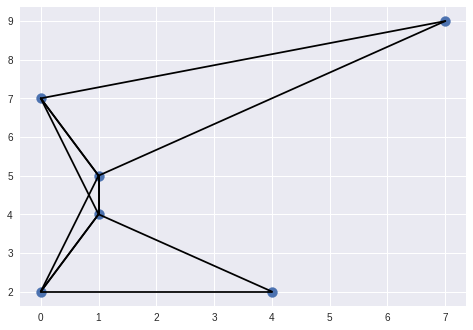

In [46]:
plt.scatter(points[:, 0], points[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(points.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(points[j], points[i]), color='black')
        
plt.show()